In [1]:
import os
# from re import search
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\CMD Research\\CMD Remote Repository'

In [2]:
import astropy
# print(astropy.cosmology.realizations.available)

from astropy.cosmology import WMAP9 as wmap
from astropy.cosmology import Planck18 as planck
import pandas as pd

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
# import healpy as hp

The autocorrelation function gives the measure of similarity between a signal and its time-delayed version.

Via [this article](https://www.tutorialspoint.com/power-spectral-density-psd-and-autocorrelation-function)

##### <b> ACT TT Spectra </b>

The $C_l$ spectra are binned, and are given with the following columns:
- the mean multipole moment $l$
- the power spectrum in units of $\mu K^2 C_l$
- the error for the binned value in units of $\mu K^2 C_l$ (the standard deviation of the input data points divided by the square root of their number)

In [3]:
with open(os.path.relpath('../Local Data Files/ACT/spectrum_TT.dat'), 'r') as file:
    act_tt_data = pd.read_csv(file, sep='\s+', header=None)

type(act_tt_data), act_tt_data.head()

(pandas.core.frame.DataFrame,
        0         1         2
 0  350.5  0.125065  0.015274
 1  400.5  0.061844  0.008171
 2  450.5  0.061938  0.005804
 3  500.5  0.055553  0.005217
 4  550.5  0.051276  0.004034)

In [4]:
# will have to manually calculate errors and graph that (to be fixed), for now just graphing l vs power spectrum
# Plotting ACT Data
# ax.plot(act_tt_data[0], act_tt_data[1],
#         label = "ACT",
#         color = "m",
#         marker = "o",
#         linestyle = "--",
#         markersize = 5);
# ax.legend(loc = 0)

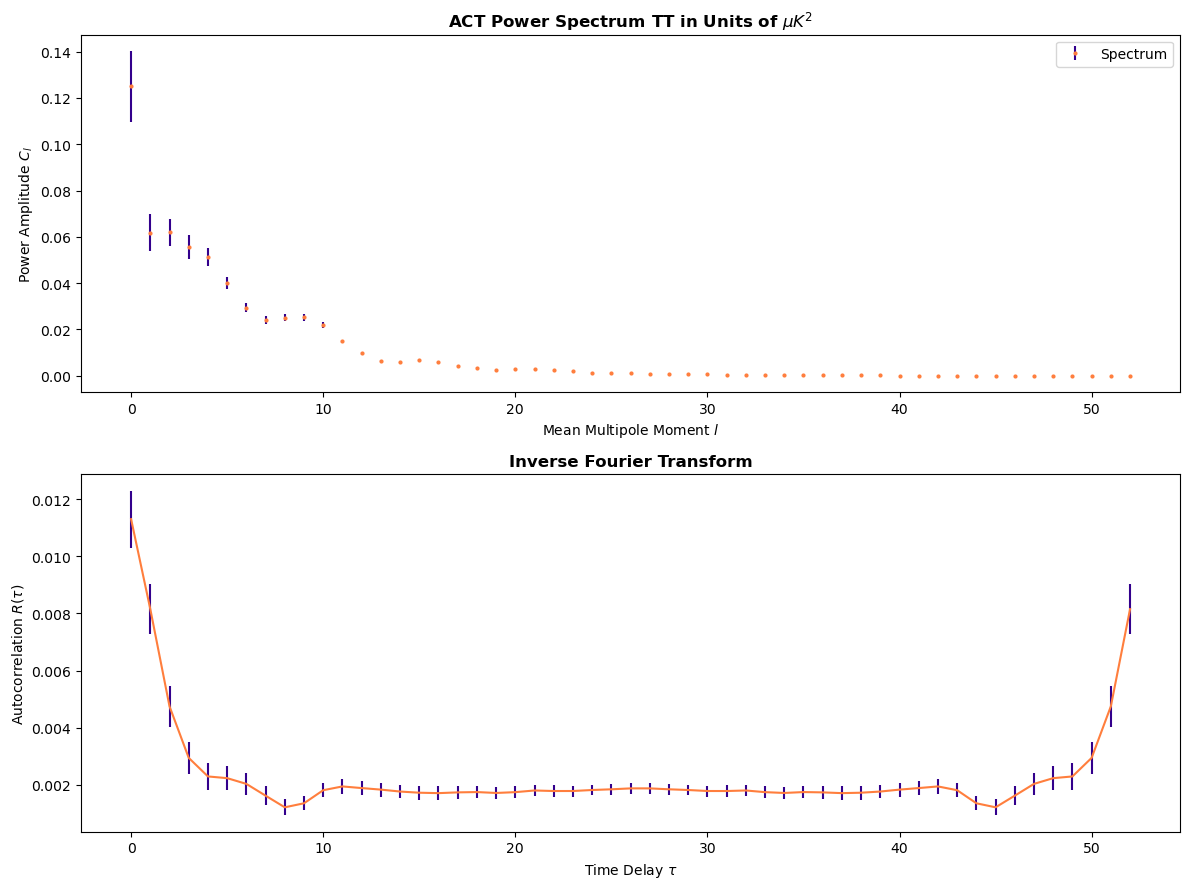

In [38]:
# Plotting ACT Data
power1D = act_tt_data[1]
p1Derror = act_tt_data[2]

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.xlabel(r"Mean Multipole Moment $l$")
plt.ylabel(r"Power Amplitude $C_{l}$")
plt.title(r"ACT Power Spectrum TT in Units of $\mu K^2$", weight = "bold")

plt.errorbar(np.arange(len(power1D)), power1D, yerr=p1Derror,
        label = "Spectrum",
        color = "#ff7e3d", 
        ecolor = "#33008c", # colors in RGBA (hex), control alpha/transparency by adding 2 more digits (%tage)
        marker = "o",
        markersize = 2,
        linestyle = "None"); # use lambda as x-axis
plt.legend(loc = 0)

# autocorrelation - inverse fourier transform
plt.subplot(2, 1, 2)

signal = np.fft.ifft(power1D)
sigerr = np.abs(np.fft.ifft(p1Derror))
plt.errorbar(np.arange(len(signal)), signal.real, color = "#ff7e3d", yerr=sigerr.real, ecolor = "#33008c")
# plt.ylim(-1e6, 1e6)
plt.xlabel(r"Time Delay $\tau$")
plt.ylabel(r"Autocorrelation $R(\tau)$")
plt.title(r"Inverse Fourier Transform", weight = "bold")
plt.tight_layout()

##### <b> WMAP9 TT Spectra </b>

The complete (unbinned) TT power spectrum data are provided as an ASCII table containing the following columns:
- The multipole moment $l$
- The power spectrum in units of $\mu K^2$
- The error derived from the diagonal elements of the covariance matrix in units of $\mu K^2$
- The portion of column 3 attributed to measurement errors in units of $\mu K^2$
- The portion of column 3 attributed to cosmic variance in units of $\mu K^2$, assuming the best-fit ΛCDM model.

In [5]:
with open(os.path.relpath('../Local Data Files/WMAP/Spectral Data/wmap_tt_spectrum_9yr_v5.txt'), 'r') as file:
    wmap_tt_data = pd.read_csv(file, sep='\s+', header=None, index_col=0)
    # wmap_tt_data = wmap_tt_data.drop(wmap_tt_data.columns[[0]], axis=1)

type(wmap_tt_data), wmap_tt_data

(pandas.core.frame.DataFrame,
               1          2          3         4
 0                                              
 2      150.6398   708.3154     8.6102  708.2630
 3      902.1805   565.3141     9.6361  565.2320
 4      730.3626   471.9324    10.1917  471.8224
 5     1467.8517   409.7481    10.5276  409.6128
 6      688.5324   366.8310    10.7223  366.6742
 ...         ...        ...        ...       ...
 1196  9375.3164  5655.1530  5654.9683   45.7047
 1197   112.8482  5691.4318  5691.2496   45.5132
 1198  2322.1509  5726.6724  5726.4931   45.3116
 1199 -4873.3315  5775.1737  5774.9969   45.2093
 1200  7194.9780  5811.3539  5811.1797   45.0078
 
 [1199 rows x 4 columns])

In [6]:
# scrapwork (ignore)
# wmap_tt_mean = wmap_tt_data[2].mean()
# wmap_tt_std = wmap_tt_data[2].std()
# wmap_tt_num = wmap_tt_data[2].count()

# np.random.seed(0)
# # x = wmap_tt_mean + wmap_tt_std*wmap_tt_num
# bin_width = 3.5*wmap_tt_std / wmap_tt_num**(1./3.)
# bins = np.arange(0, wmap_tt_num, 1) # start, stop, step

# wmap_tt_num, len(wmap_tt_data[1]), bin_width, bins

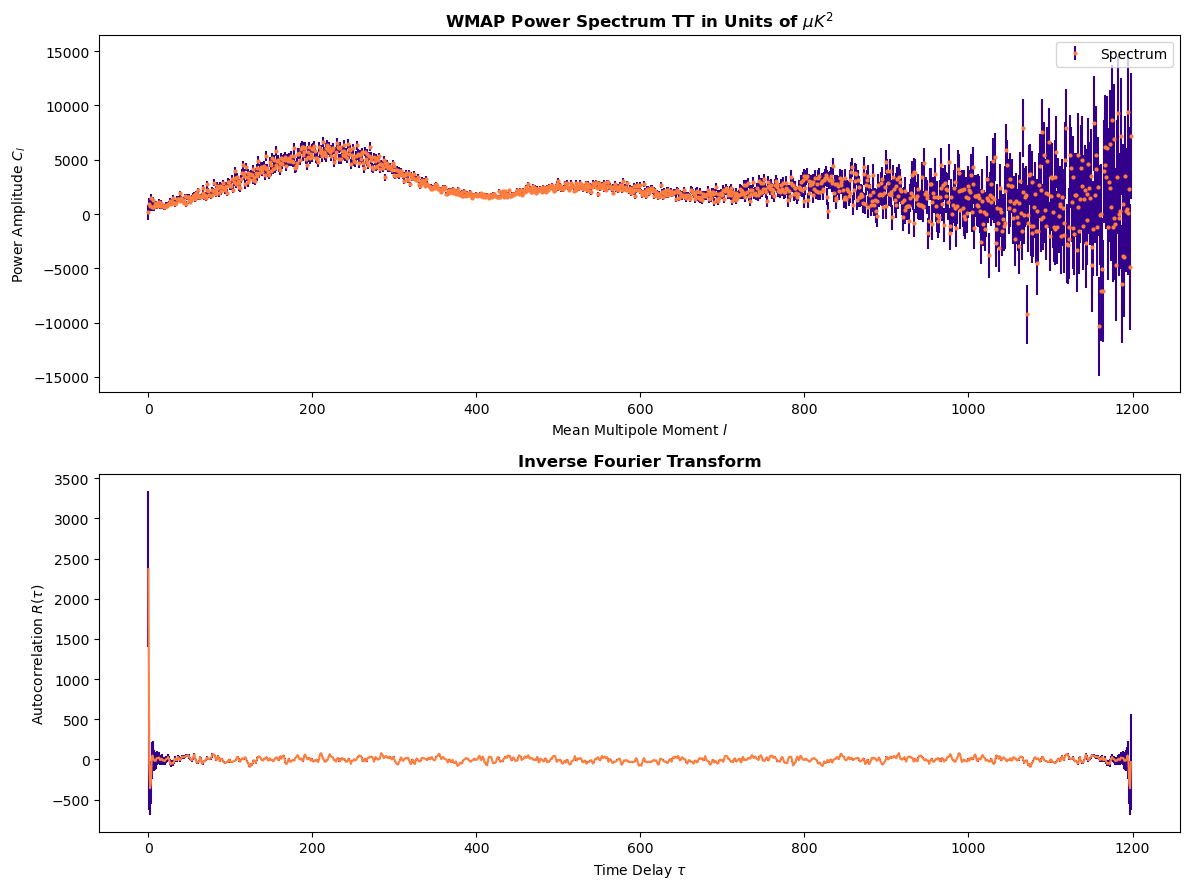

In [8]:
# Plotting WMAP Data
power1D = wmap_tt_data[1]
p1Derror = wmap_tt_data[2]

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.xlabel(r"Mean Multipole Moment $l$")
plt.ylabel(r"Power Amplitude $C_{l}$")
plt.title(r"WMAP Power Spectrum TT in Units of $\mu K^2$", weight = "bold")

plt.errorbar(np.arange(len(power1D)), power1D, yerr=p1Derror,
        label = "Spectrum",
        color = "#ff7e3d", 
        ecolor = "#33008c", # colors in RGBA (hex), control alpha/transparency by adding 2 more digits (%tage)
        marker = "o",
        markersize = 2,
        linestyle = "None"); # use lambda as x-axis
plt.legend(loc = 0)

# autocorrelation - inverse fourier transform
plt.subplot(2, 1, 2)

signal = np.fft.ifft(power1D)
sigerr = np.abs(np.fft.ifft(p1Derror))
plt.errorbar(np.arange(len(signal)), signal.real, color = "#ff7e3d", yerr=sigerr.real, ecolor = "#33008c")
# plt.ylim(-1e6, 1e6)
plt.xlabel(r"Time Delay $\tau$")
plt.ylabel(r"Autocorrelation $R(\tau)$")
plt.title(r"Inverse Fourier Transform", weight = "bold")
plt.tight_layout()

##### <b> Planck TT Spectra </b>

In [35]:
with open(os.path.relpath('../Local Data Files/Planck/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'), 'r') as file:
    planck_tt_data = np.loadtxt(file)
    print(planck_tt_data.shape)

(2507, 6)


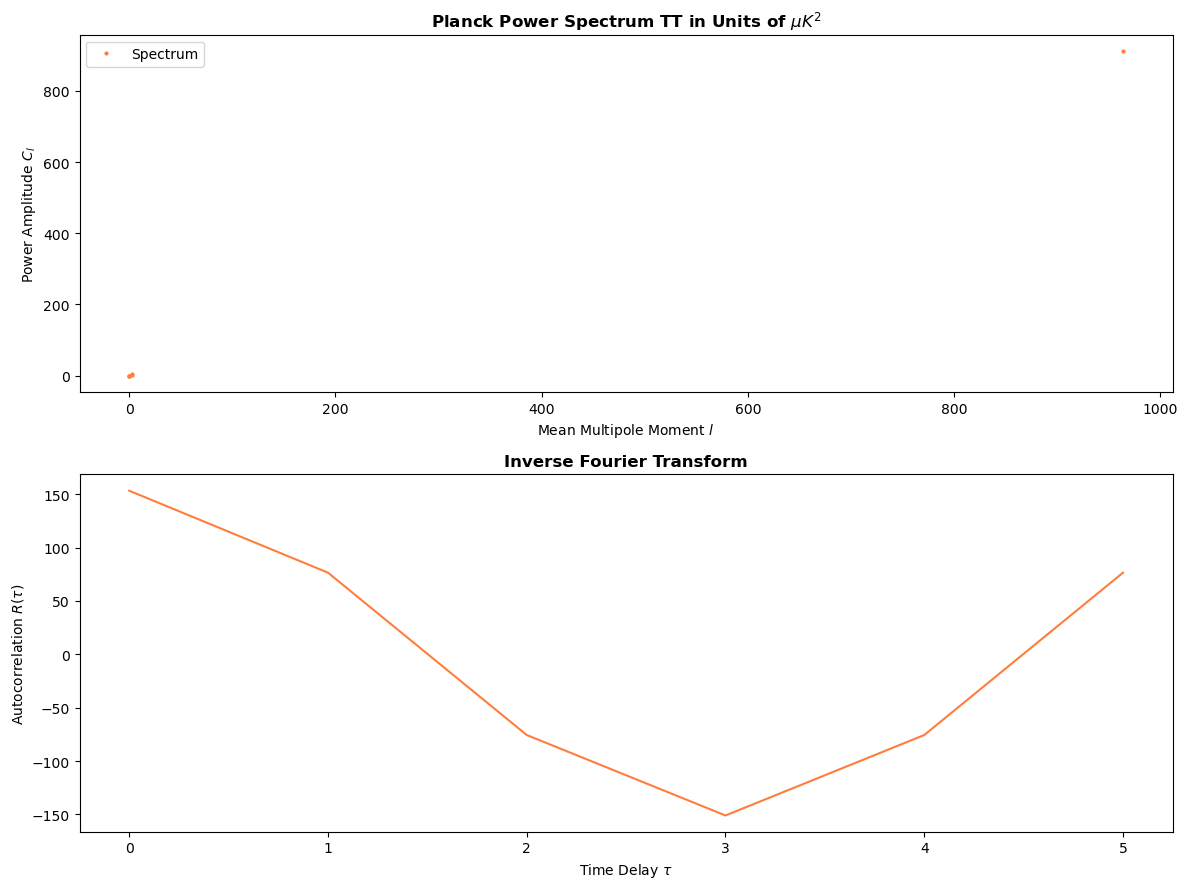

In [37]:
# Plotting Planck Data
moment = planck_tt_data[1]
power1D = planck_tt_data[2]

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.xlabel(r"Mean Multipole Moment $l$")
plt.ylabel(r"Power Amplitude $C_{l}$")
plt.title(r"Planck Power Spectrum TT in Units of $\mu K^2$", weight = "bold")

plt.plot(moment, power1D, label = "Spectrum", color = "#ff7e3d", marker = "o", markersize = 2, linestyle = "None");
plt.legend(loc = 0)

# autocorrelation - inverse fourier transform
plt.subplot(2, 1, 2)

signal = np.fft.ifft(power1D)
plt.plot(np.arange(len(signal)), signal.real, color = "#ff7e3d")
# plt.ylim(-1e6, 1e6)
plt.xlabel(r"Time Delay $\tau$")
plt.ylabel(r"Autocorrelation $R(\tau)$")
plt.title(r"Inverse Fourier Transform", weight = "bold")
plt.tight_layout()


